# Project: Titanic Data Analysis


## Introduction 

In this project I'll be analyzing the Titanic Dataset, pointing out factors responsible for the death or survival of individuals on the ship.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## Data Wrangling

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




## Data Cleaning

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## Exploratory Data Analysis

In [9]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
survived = df[df['Survived']==1]
died = df[df['Survived']==0]

print('Analysis of Survival')
print('{0} survived the wrek'.format(survived.shape[0]))
print('{0} did not survive the wrek'.format(died.shape[0]))

survived_percent = round((float(len(survived)/len(df))*100),2)
died_percent = round((float(len(died)/len(df))*100),2)

print('Survival Percentage = {0}'.format(survived_percent))
print('Death Percentage = {0}'.format(died_percent))


Analysis of Survival
342 survived the wrek
549 did not survive the wrek
Survival Percentage = 38.38
Death Percentage = 61.62


In [11]:
df.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [12]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [13]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

Text(0.5, 0, 'Sex')

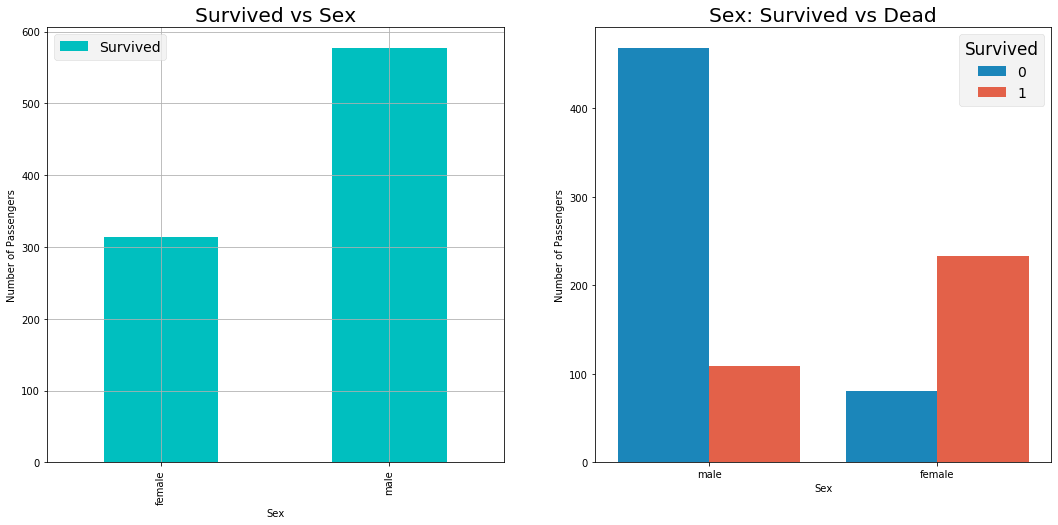

In [14]:
f,ax = plt.subplots(1,2,figsize=(18,8))
plt.style.use('fivethirtyeight')
df[['Sex','Survived']].groupby(['Sex']).count().plot.bar(ax=ax[0],color='c')
sns.countplot('Sex',hue='Survived',ax=ax[1],data = df)
ax[0].set_title('Survived vs Sex')
ax[0].set_ylabel('Number of Passengers')
ax[0].set_xlabel('Sex')
ax[1].set_title('Sex: Survived vs Dead')
ax[1].set_ylabel('Number of Passengers')
ax[1].set_xlabel('Sex')

In [15]:
df.groupby(['Pclass'])['Sex'].count()

Pclass
1    216
2    184
3    491
Name: Sex, dtype: int64

In [16]:
df.groupby(['Pclass','Survived'])['Sex'].value_counts()

Pclass  Survived  Sex   
1       0         male       77
                  female      3
        1         female     91
                  male       45
2       0         male       91
                  female      6
        1         female     70
                  male       17
3       0         male      300
                  female     72
        1         female     72
                  male       47
Name: Sex, dtype: int64

Text(0.5, 0, 'Class')

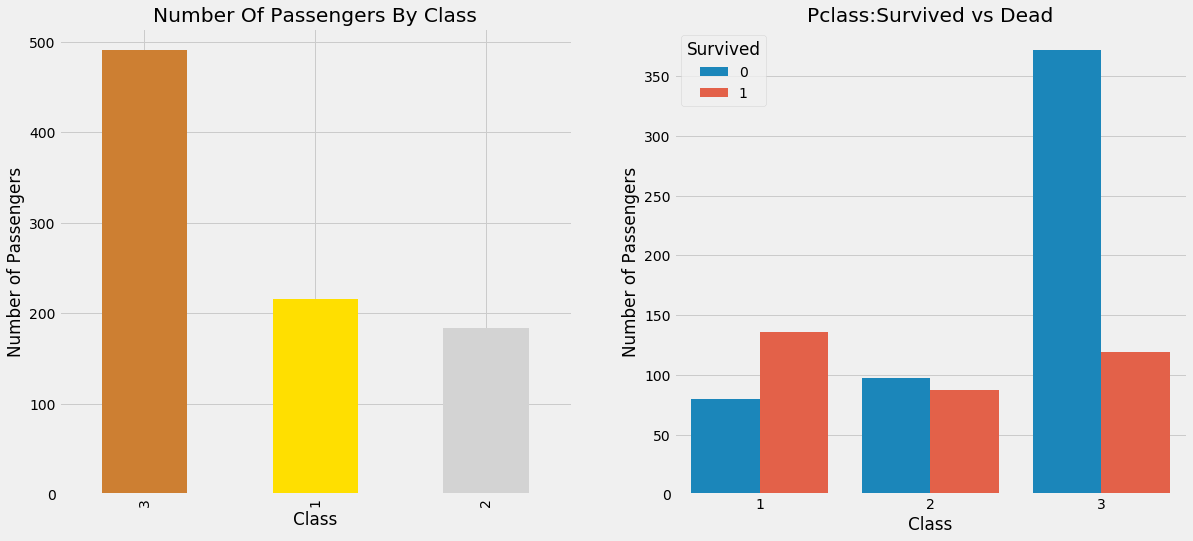

In [17]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(ax=ax[0], color=['#CD7F32','#FFDF00','#D3D3D3'])
sns.countplot('Pclass',hue='Survived',ax=ax[1],data=df)
ax[0].set_title('Number Of Passengers By Class')
ax[0].set_ylabel('Number of Passengers')
ax[0].set_xlabel('Class')
ax[1].set_title('Pclass:Survived vs Dead')
ax[1].set_ylabel('Number of Passengers')
ax[1].set_xlabel('Class')

Text(0.5, 1.0, 'Death')

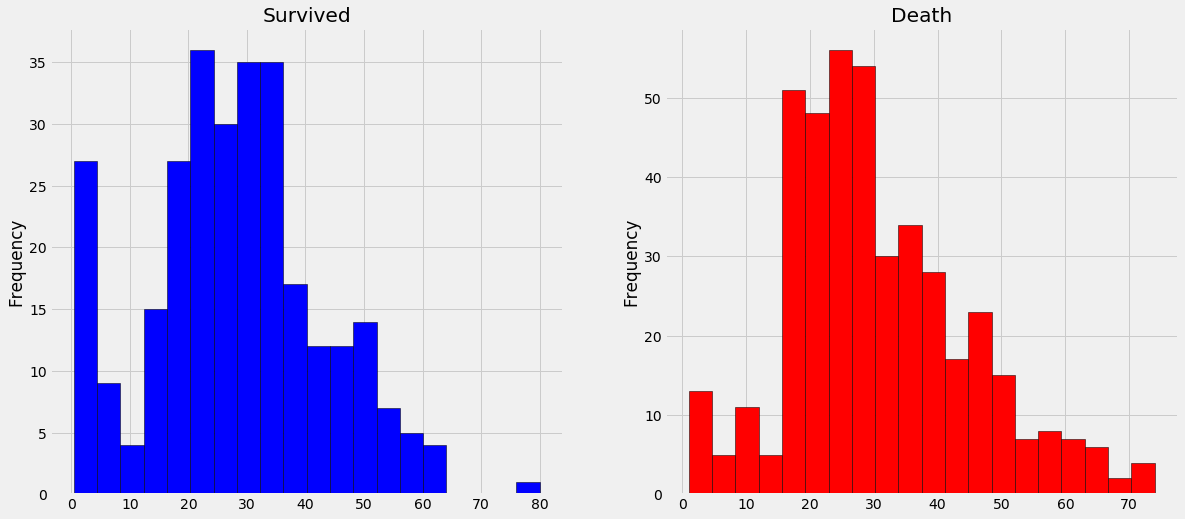

In [18]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df[df['Survived']==1]['Age'].plot.hist(ax=ax[0],bins=20,color='b',edgecolor='k')
ax[0].set_title('Survived')
df[df['Survived']==0]['Age'].plot.hist(ax=ax[1],bins=20,color='r',edgecolor='k')
ax[1].set_title('Death')



## Conclusion

Here I Analyze...

The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18–19%.

The Passengers Of Class 1 were given a very high priority while rescue. Even though the the number of Passengers in Class 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).
The oldest Passenger was saved(80 years).
Maximum number of deaths were in the age group of 20–30.
